# Introduction
The sinking of Titanic is one of the most notorious shipredcks in history. In 1912, during her voyage, the titanic sank after colliding with an iceberg, killing 1502 out of 2224 passangers and crew.

<font color = "gray">
Content:

1. [Load and Check Data](#1)
1. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable Analysis](#4)
        * [Numerical Variable Analysis](#5)
1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7)
1. [Missing Values](#8)
    * [Find Missing Values](#9)
    * [Fill Missing Values](#10)
        

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<a id = "1"></a>
# Load and Check Data 

In [53]:
train_df = pd.read_csv("C:/Users/MRE/Documents/GitHub/Titanic-Project/Dataset/train.csv")
test_df = pd.read_csv("C:/Users/MRE/Documents/GitHub/Titanic-Project/Dataset/test.csv")
test_PassangerId = test_df["PassengerId"]

In [54]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id = "2"></a><
# Variable Description

1. PassengerId: Unique id number of passanger
2. Survived: Passanger who survive (1) or die (0)
3. Pclass: Passanger Class
4. Name: Name
5. Sex: Gender of Passanger
6. Age: Age of Passanger
7. SibSp: Number of siblins/spouses
8. Parch: Number of parents/children
9. Ticket:  Ticket Number
10. Fare: Amount of money spent on ticket
11. Cabin: Cabin Category
12. Embarke: Port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southmpton)

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Fare and Age
* int64(5): Pclass, Sibsp, Parch, PassangerId, Survived
* object(5): Cabin, Embarked, Ticket, Name and Sex

<a id="3"></a><br>
# Univariate Variable Analysis
* Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
* Numerical Variable: Fare, age and PassengerId

<a id="4"></a><br>
## Categorical Variable Analysis

In [57]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """

    var = train_df[variable] #Get Feature
    varValue = var.value_counts() #Count number of categorical variable(value/sample)

    #Visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))

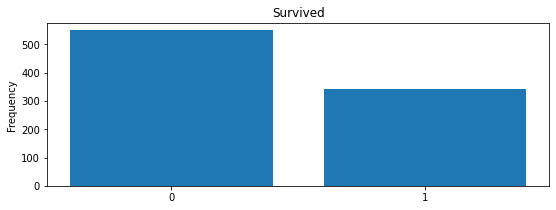

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


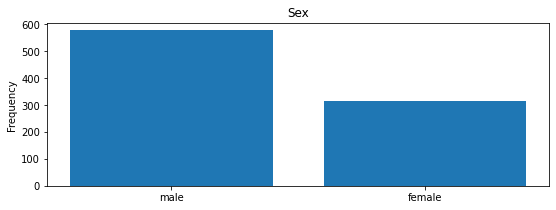

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


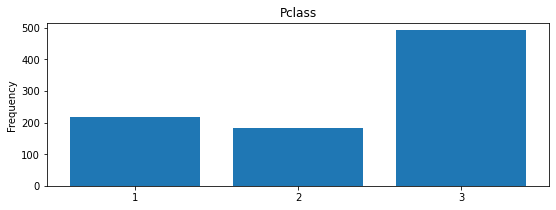

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


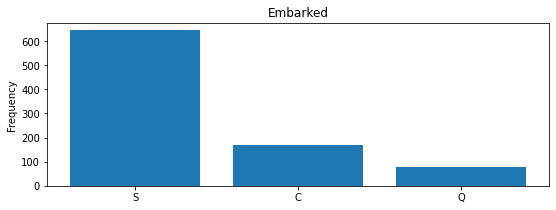

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


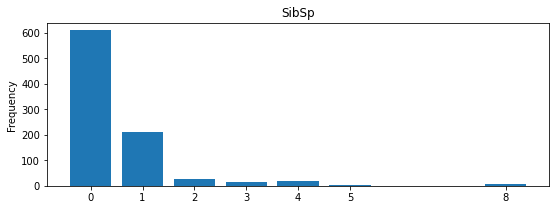

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


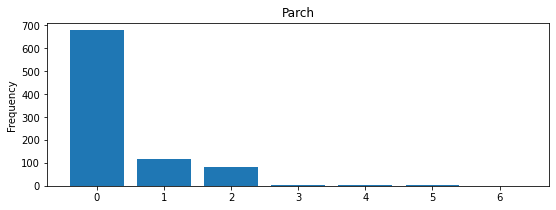

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [58]:
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for c in category1:
    bar_plot(c)

<a id="5"></a><br>
## Numerical Variable Analysis

In [59]:
def plot_hist(variable):
    plt.figure(figsize=(9, 3))
    plt.hist(train_df[variable])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist.".format(variable))
    plt.show()

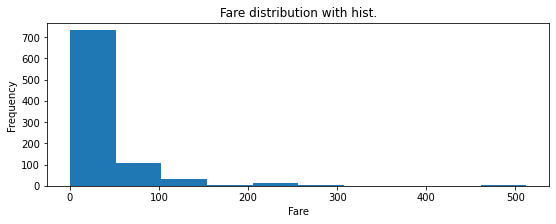

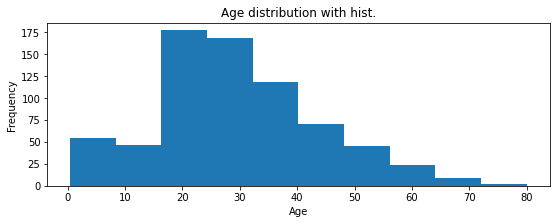

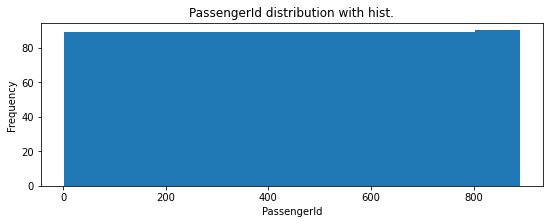

In [60]:
numericVar = ["Fare", "Age", "PassengerId"]
for n in numericVar:
    plot_hist(n)

<a id="6"></a><br>
# Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* Parch - Survived
* SibSp - Survived

In [61]:
# Pclass & Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by = "Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [62]:
train_df[["Sex","Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by = "Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [63]:
train_df[["Parch","Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by = "Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [64]:
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by = "Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<a id="7"></a><br>
# Outlier Detection

In [65]:
from collections import Counter


def detect_outlier(df, features):
    outlier_indices = []
    
    for c in features:

        #1st quartile
        Q1 = np.percentile(df[c], 25)
        #3rd quartile
        Q3 = np.percentile(df[c], 75)
        #IQR
        IQR = Q3 - Q1
        #Outlier Step
        outlier_step = IQR * 1.5
        #Detect Outlier and Their Indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 - outlier_step)].index
        #Store indeces
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers

In [66]:
train_df.loc[detect_outlier(train_df, ["Age", "SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [67]:
#Drop Outliers
train_df = train_df.drop(detect_outlier(train_df, ["Age", "SibSp", "Parch", "Fare"]), axis=0).reset_index(drop=True)

<a id="8"></a><br>
# Missing Values

In [68]:
train_df_len = len(train_df)
train_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

<a id="9"></a><br>
## Find Missing Values

In [69]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [70]:
train_df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            243
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          864
Embarked         2
dtype: int64

<a id="10"></a><br>

## Fill Missing Values

In [71]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
48,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
633,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


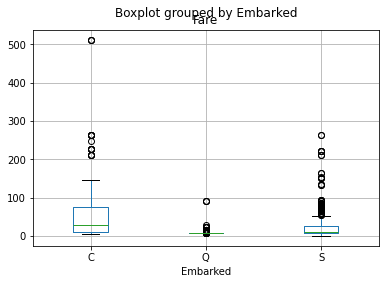

In [73]:
train_df.boxplot(column="Fare", by="Embarked")
plt.show()

In [76]:
train_df["Embarked"] = train_df["Embarked"].fillna('C')
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [77]:
train_df[train_df["Fare"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
830,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [80]:
train_df["Fare"] =train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))


In [81]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
